#Clasificación

Este notebook es para ejemplificar la teoría de clasificación.

Vamos a utilizar el dataset de `Diabetes` que viene en este [link](https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv) de todas formas en la pestaña de abajo se hace un método get para obtener el csv desde dicho link 👇

## 1. Cargamos el dataset

In [1]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-09-12 00:43:22--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.007s  

2023-09-12 00:43:22 (3.36 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 2. Analizamos dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


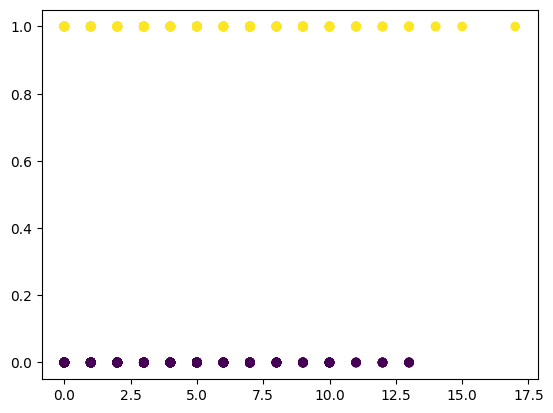

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Pregnancies'],data['Outcome'],c=data['Outcome']);

In [5]:
import seaborn as sns
sns.set()

In [6]:
X = data.drop(columns='Outcome')
y = data['Outcome']

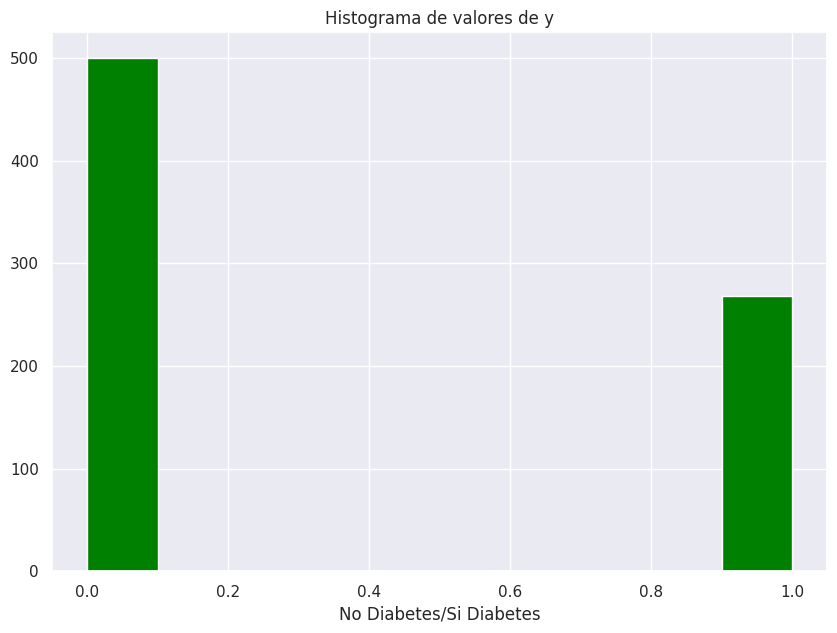

In [7]:
plt.figure(figsize=(10,7))
plt.hist(y,color='green')
plt.xlabel("No Diabetes/Si Diabetes")
plt.title("Histograma de valores de y");

## 3. Separamos los datos

In [47]:
#Separamos los datos de forma estratificada para mantener la proporcion de distribución de Y
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, stratify= y, random_state=42)
print(f"Set de entrenamiento {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo {Xtest.shape}, {ytest.shape}")

Set de entrenamiento (576, 8), (576,)
Set de testeo (192, 8), (192,)


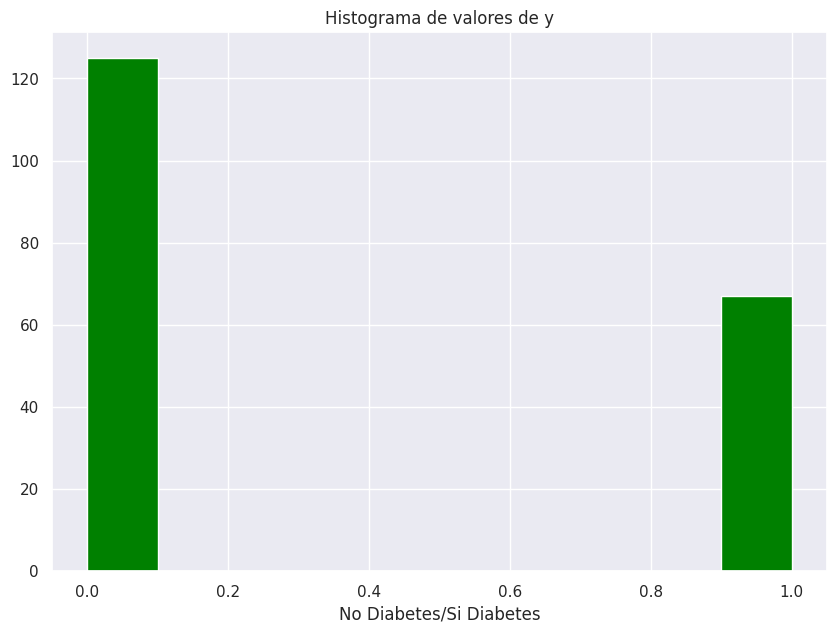

In [48]:
plt.figure(figsize=(10,7))
plt.hist(ytest,color='green')
plt.xlabel("No Diabetes/Si Diabetes")
plt.title("Histograma de valores de y");

## 4. Entrenamos el modelo de Regresión Logística

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [50]:
model_logreg = make_pipeline(StandardScaler(),LogisticRegression())
model_logreg.fit(Xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## 5. Evaluamos el modelo de regresión logistica

In [51]:
model_logreg.predict_proba(Xtest)

array([[0.56508817, 0.43491183],
       [0.65721651, 0.34278349],
       [0.89752939, 0.10247061],
       [0.55304731, 0.44695269],
       [0.2006436 , 0.7993564 ],
       [0.81654794, 0.18345206],
       [0.66025745, 0.33974255],
       [0.97762792, 0.02237208],
       [0.37226506, 0.62773494],
       [0.96060438, 0.03939562],
       [0.76855994, 0.23144006],
       [0.2694554 , 0.7305446 ],
       [0.73639142, 0.26360858],
       [0.89479422, 0.10520578],
       [0.45737326, 0.54262674],
       [0.06566167, 0.93433833],
       [0.35500096, 0.64499904],
       [0.90080947, 0.09919053],
       [0.96901623, 0.03098377],
       [0.7353257 , 0.2646743 ],
       [0.92103444, 0.07896556],
       [0.83803048, 0.16196952],
       [0.89892722, 0.10107278],
       [0.21024399, 0.78975601],
       [0.10973329, 0.89026671],
       [0.1927299 , 0.8072701 ],
       [0.88012699, 0.11987301],
       [0.92937067, 0.07062933],
       [0.09654911, 0.90345089],
       [0.23603273, 0.76396727],
       [0.

In [52]:
model_logreg.predict(Xtest)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [53]:
print(f"R2 en entrenamiento: {model_logreg.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_logreg.score(Xtest,ytest)}")

R2 en entrenamiento: 0.7951388888888888
R2 en testeo: 0.734375


In [54]:
from sklearn import metrics as ms

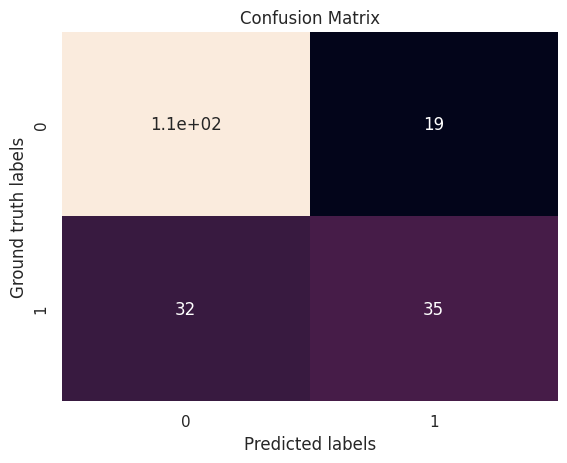

In [56]:
y_pred_logreg = model_logreg.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [57]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_logreg = ms.accuracy_score(y_true = ytest, y_pred = y_pred_logreg)
precision_logreg = ms.precision_score(y_true = ytest, y_pred = y_pred_logreg)
recall_logreg = ms.recall_score(y_true = ytest, y_pred = y_pred_logreg)
f1_logreg = ms.f1_score(y_true = ytest, y_pred = y_pred_logreg)

logreg_metrics = {"Accuracy":acc_logreg,
                  "Precision":precision_logreg,
                  "Recall":recall_logreg,
                  "F1":f1_logreg}
logreg_metrics

{'Accuracy': 0.734375,
 'Precision': 0.6481481481481481,
 'Recall': 0.5223880597014925,
 'F1': 0.5785123966942148}

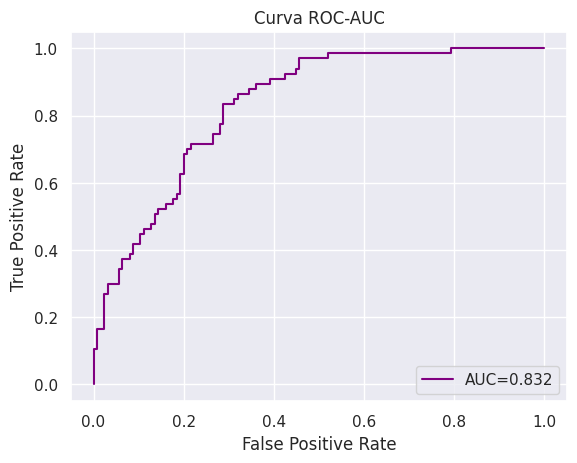

In [58]:
from matplotlib.font_manager import MSFontDirectories
# Ahora ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_logreg.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

> **Nota:** para más información de la curva ROC-AUC ir a este [link](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

## 6. Entrenamos modelo de Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
from sklearn.preprocessing import MinMaxScaler
model_naive = make_pipeline(MinMaxScaler(),MultinomialNB())
model_naive.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

## 7. Evaluamos el modelo de Naive Bayes

In [60]:
print(f"R2 en entrenamiento: {model_naive.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_naive.score(Xtest,ytest)}")

R2 en entrenamiento: 0.6510416666666666
R2 en testeo: 0.6510416666666666


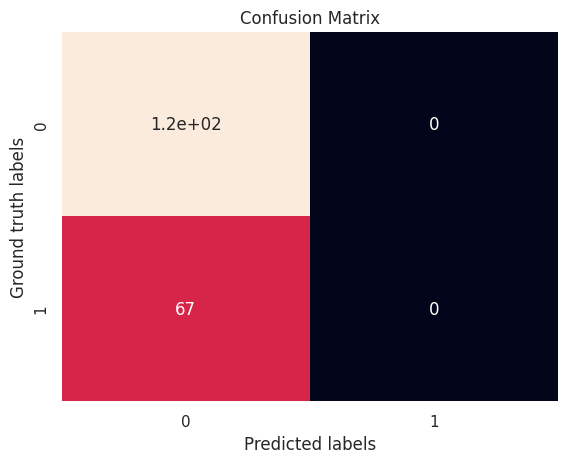

In [61]:
y_pred_naive = model_naive.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_naive)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [62]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)

naive_metrics = {"Accuracy":acc_naive,
                  "Precision":precision_naive,
                  "Recall":recall_naive,
                  "F1":f1_naive}
naive_metrics

{'Accuracy': 0.6510416666666666, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

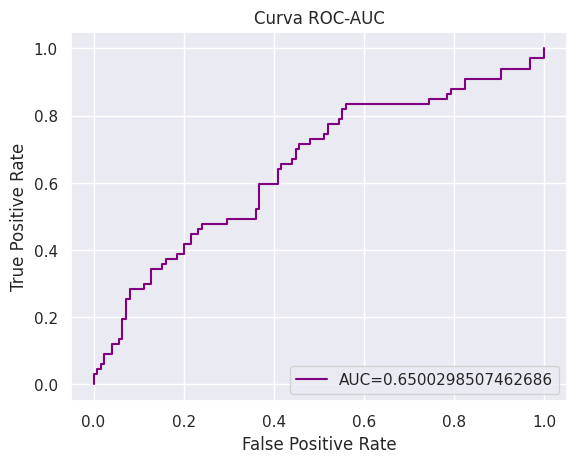

In [63]:
from matplotlib.font_manager import MSFontDirectories
# Ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_naive.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

## 8. Entrenamos el modelo Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
model_random = make_pipeline(MinMaxScaler(),RandomForestClassifier())
model_random.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

## 9. Evaluamos el modelo Random Forest

In [65]:
print(f"R2 en entrenamiento: {model_random.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_random.score(Xtest,ytest)}")

R2 en entrenamiento: 1.0
R2 en testeo: 0.75


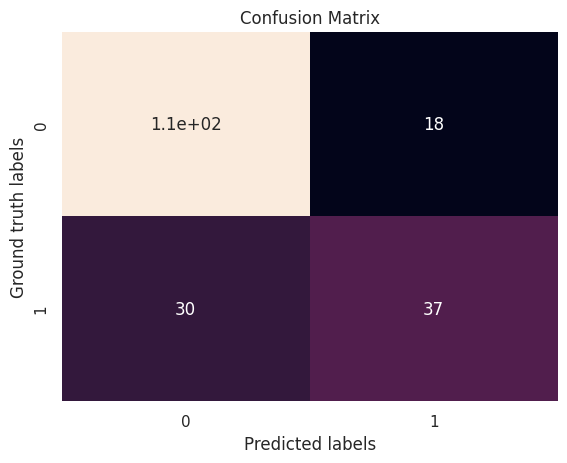

In [66]:
y_pred_random = model_random.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_random)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [67]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_random = ms.accuracy_score(y_true = ytest, y_pred = y_pred_random)
precision_random = ms.precision_score(y_true = ytest, y_pred = y_pred_random)
recall_random = ms.recall_score(y_true = ytest, y_pred = y_pred_random)
f1_random = ms.f1_score(y_true = ytest, y_pred = y_pred_random)

random_metrics = {"Accuracy":acc_random,
                  "Precision":precision_random,
                  "Recall":recall_random,
                  "F1":f1_random}
random_metrics

{'Accuracy': 0.75,
 'Precision': 0.6727272727272727,
 'Recall': 0.5522388059701493,
 'F1': 0.6065573770491803}

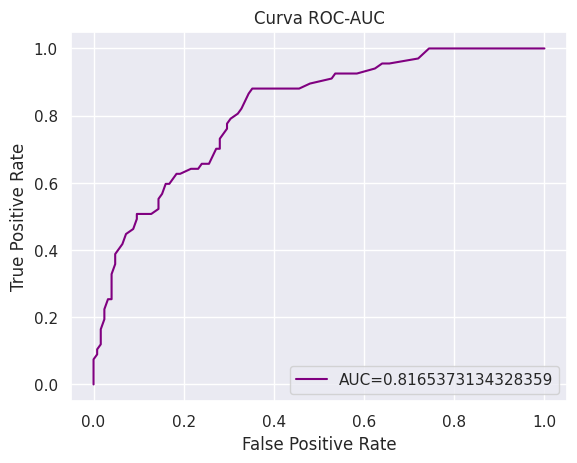

In [68]:
from matplotlib.font_manager import MSFontDirectories
# Ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_random.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

## 10. Comparamos los tres modelos

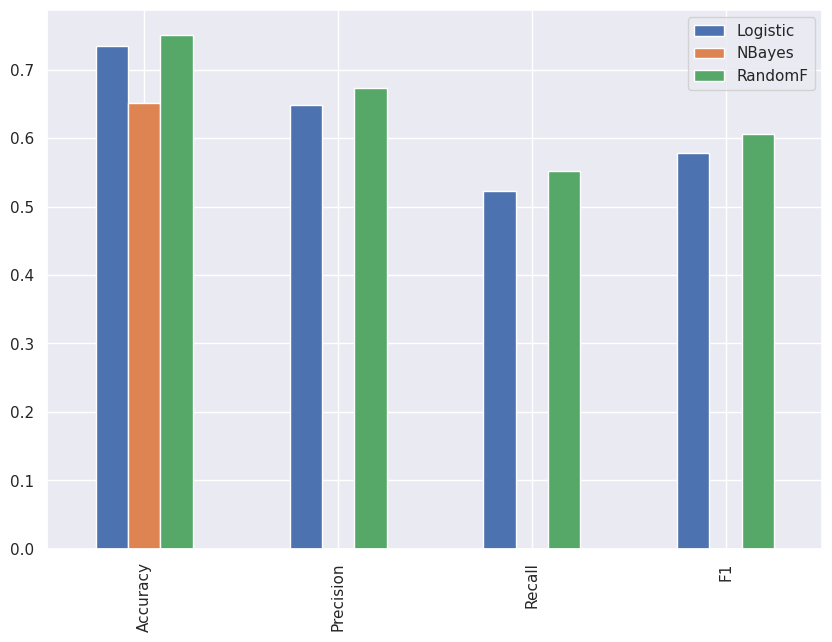

In [69]:
import pandas as pd
pd.DataFrame({"Logistic":logreg_metrics,"NBayes":naive_metrics,"RandomF":random_metrics}).plot(kind='bar',figsize=(10,7));